<a href="https://colab.research.google.com/github/KuroiYoshiko/Datasets-analysis/blob/master/IO_LAB_DATA_CLEANING3_empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import bibliotek
Wczytanie danych -> ride_sharing_new5.csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving ride_sharing_new5.csv to ride_sharing_new5.csv


Wyświetlenie danych

In [ ]:
ride_sharing = pd.read_csv("ride_sharing_new5.csv", index_col=False)
# Preview the first 5 lines of the loaded data
ride_sharing.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_size,ride_id,bike_color
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,27,1000,1000004.0
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,28,1001,NaN
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,25,1002,1000003.0
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,27,1003,NaN
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,27,1004,NaN


In [ ]:
# Count missing data
column_names = ride_sharing.columns
counter = ride_sharing[column_names].isnull().sum()
print (counter)

duration            296
station_A_id          0
station_A_name        0
station_B_id          0
station_B_name        0
bike_id               0
user_type             0
user_birth_year       0
user_gender           0
tire_size             0
ride_id               0
bike_color         5191
dtype: int64


Wyświetlenie brakujących danych

duration - 1%
station_A_id - 0%
station_A_name - 0%
station_B_id - 0%
station_B_name - 0%
bike_id - 0%
user_type - 0%
user_birth_year - 0%
user_gender - 0%
tire_size - 0%
ride_id - 0%
bike_color - 20%


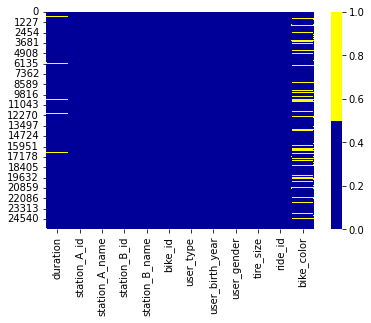

In [ ]:
#HEATMAP

cols = ride_sharing.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(ride_sharing[cols].isnull(), cmap=sns.color_palette(colours))

# or if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in ride_sharing.columns:
    pct_missing = np.mean(ride_sharing[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))



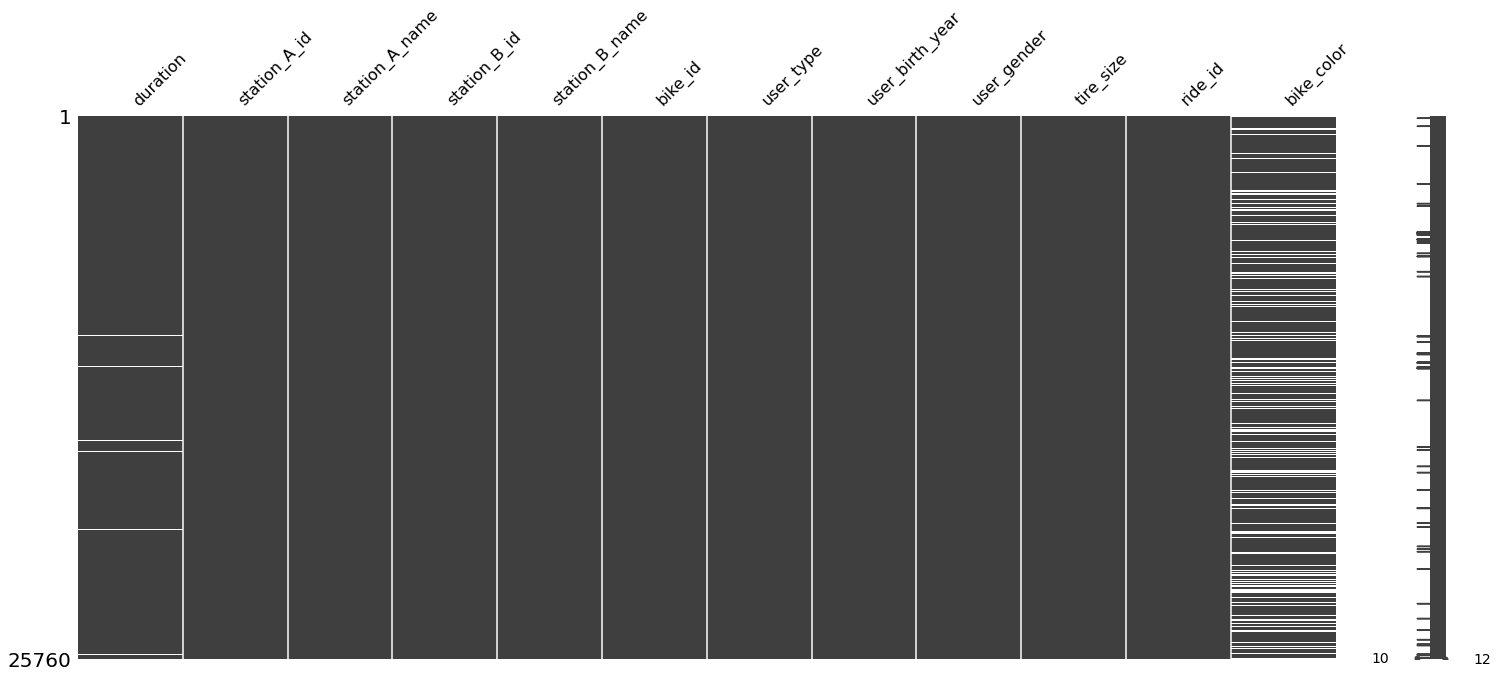

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(ride_sharing)
plt.show()

Usunięcie wybrakowanych danych (usunięcie całej kolumny)

In [ ]:
# 'bike_color' has a lot of missing.
# If we want to drop.
cols_to_drop = ['bike_color']
ride_sharing = ride_sharing.drop(cols_to_drop, axis=1)

ride_sharing.head()



,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_size,ride_id
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,27,1000
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,28,1001
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,25,1002
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,27,1003
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,27,1004


In [ ]:
# Count missing data
column_names = ride_sharing.columns
counter = ride_sharing[column_names].isnull().sum()
print (counter)

duration           296
station_A_id         0
station_A_name       0
station_B_id         0
station_B_name       0
bike_id              0
user_type            0
user_birth_year      0
user_gender          0
tire_size            0
ride_id              0
dtype: int64


Usunięcie wybrakowanych danych (usunięcie obserwacji z brakującymi danymi - usunięcie wierszy)

In [ ]:
# first create missing indicator for features with missing data
for col in ride_sharing.columns:
    missing = ride_sharing[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        ride_sharing['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in ride_sharing.columns if 'ismissing' in col]
ride_sharing['num_missing'] = ride_sharing[ismissing_cols].sum(axis=1)


# drop rows with a lot of missing values.
ind_missing = ride_sharing[ride_sharing['num_missing'] > 0].index


# Przepisujemy do zmiennej ride_sharing tylko obserwacje gdzie num_missing jest większe od 0
ride_sharing = ride_sharing.drop(ind_missing, axis=0)
print(ride_sharing)


created missing indicator for: duration
         duration  station_A_id  ... duration_ismissing  num_missing
0      12 minutes            81  ...              False            0
1      24 minutes             3  ...              False            0
2       8 minutes            67  ...              False            0
3       4 minutes            16  ...              False            0
4      11 minutes            22  ...              False            0
...           ...           ...  ...                ...          ...
25754   9 minutes            21  ...              False            0
25755  11 minutes            15  ...              False            0
25756  10 minutes            15  ...              False            0
25757  14 minutes            15  ...              False            0
25758  14 minutes            15  ...              False            0

[25464 rows x 13 columns]


In [ ]:
# Count missing data
column_names = ride_sharing.columns
counter = ride_sharing[column_names].isnull().sum()
print (counter)

duration              0
station_A_id          0
station_A_name        0
station_B_id          0
station_B_name        0
bike_id               0
user_type             0
user_birth_year       0
user_gender           0
tire_size             0
ride_id               0
duration_ismissing    0
num_missing           0
dtype: int64


Pozbyliśmy się brakujących danych, teraz jeszcze musimy usunąć dodane kolumny pomocnicze ['bike_color_ismissing','num_missing']

Usunięcie dodanych kolumn

In [ ]:
# If we want to remove additional columns
cols_to_drop = ['duration_ismissing','num_missing']
ride_sharing = ride_sharing.drop(cols_to_drop, axis=1)

ride_sharing.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_size,ride_id
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,27,1000
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,28,1001
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,25,1002
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,27,1003
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,27,1004


Odcięcie "minutes"
Zamiana kolumny 'duration' STR->INT

In [ ]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip("minutes")

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())


         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25754   9 minutes            9               9
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14

[25464 rows x 3 columns]
11.174363807728557


Usuwanie danych spoza ustalonego zakresu

Sprawdzamy jakie są unikalne wartości opon wypożyczanych rowerów

In [ ]:
print(ride_sharing['tire_size'].describe())
print(ride_sharing['tire_size'].unique())

count     25464
unique        3
top          27
freq      12656
Name: tire_size, dtype: int64
[27, 25, 26]
Categories (3, int64): [27, 25, 26]


Wiemy, że nie było rowerów z oponami o wielkości 28 cali, więc to zapewne błąd - można je usunąć. Ale aby nie tracić zbyt wielu obserwacji, zamienimy wartość 28 cali na 27 cali.

In [ ]:
# Convert tire_sizes to integer
ride_sharing['tire_size'] = ride_sharing['tire_size'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_size'] > 27, 'tire_size'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_size'] = ride_sharing['tire_size'].astype('category')

# Print tire size description
print(ride_sharing['tire_size'].describe())

count     25464
unique        3
top          27
freq      12656
Name: tire_size, dtype: int64


Poprawianie błędnie zapisanych dat (zamiana Rok urodzenia na max today)





In [ ]:
# Convert ride_date to datetime
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['user_birth_year'], format='%Y')

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

import datetime as dt

# Save today's date
today = pd.Timestamp('today')

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print NEW maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

2040-01-01 00:00:00
2021-11-17 09:15:29.557958


Wyszukiwanie wszystkich pełnych duplikatów

In [ ]:
# Find a duplicate rows
duplicated_rows= ride_sharing[ride_sharing.duplicated()]
print(duplicated_rows)

Usuwanie pełnych duplikatów

In [ ]:
# Drop complete duplicates from ride_sharing
print(ride_sharing)
ride_sharing = ride_sharing.drop_duplicates()
print(ride_sharing)

         duration  station_A_id  ... duration_time    ride_dt
0      12 minutes            81  ...            12 1959-01-01
1      24 minutes             3  ...            24 1965-01-01
2       8 minutes            67  ...             8 1993-01-01
3       4 minutes            16  ...             4 1979-01-01
4      11 minutes            22  ...            11 1994-01-01
...           ...           ...  ...           ...        ...
25754   9 minutes            21  ...             9 1989-01-01
25755  11 minutes            15  ...            11 2000-01-01
25756  10 minutes            15  ...            10 1998-01-01
25757  14 minutes            15  ...            14 1995-01-01
25758  14 minutes            15  ...            14 1995-01-01

[25464 rows x 14 columns]
         duration  station_A_id  ... duration_time    ride_dt
0      12 minutes            81  ...            12 1959-01-01
1      24 minutes             3  ...            24 1965-01-01
2       8 minutes            67  ...       

In [ ]:
# Sprawdzamy czy usunięto pełne duplikaty
duplicated_rows = ride_sharing[ride_sharing.duplicated()]
print(duplicated_rows)


Empty DataFrame
Columns: [duration, station_A_id, station_A_name, station_B_id, station_B_name, bike_id, user_type, user_birth_year, user_gender, tire_size, ride_id, duration_trim, duration_time, ride_dt]
Index: []


Wyszukanie duplikatów niezupełnych. Interesują nas tylko powielenia w kolumnie "ride_id". Nie powinno ich być, ponieważ pod konkretnym ID może występować tylko 1 jazda (wypożyczenie roweru).

In [ ]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset = 'ride_id', keep = False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values(by = 'ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['station_A_id', 'station_B_id', 'bike_id', 'user_type','ride_id','duration_time','user_birth_year']])

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration_time','user_birth_year']])


    station_A_id  station_B_id  ...  duration_time  user_birth_year
31             5            15  ...             38             1980
32             5            15  ...             18             1990
33            67            76  ...             36             1977
34            67            76  ...             16             1979
35             3            74  ...             31             1968
36             3            74  ...             11             1988

[6 rows x 7 columns]
    ride_id  duration_time  user_birth_year
31     1031             38             1980
32     1031             18             1990
33     1033             36             1977
34     1033             16             1979
35     1035             31             1968
36     1035             11             1988


Usuwanie niepełnych duplikatów w kolumnie 'ride_id' - dodatkowo chcemy  uśrednić wartości kolumn ['user_birth_year'] i ['duration_time']

In [ ]:
# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'mean', 'duration_time': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_sharing.groupby('ride_id').agg(statistics).reset_index()


#Sprawdzamy czy statystyki zostały wpisane poprawnie

#print(ride_unique[29:37])
filtred_data = (ride_unique[['ride_id','duration_time','user_birth_year']])
print(filtred_data[20:40])


    ride_id  duration_time  user_birth_year
20     1020             16             1998
21     1021             11             1986
22     1022             10             1982
23     1023              3             1992
24     1025              3             1990
25     1028              5             1990
26     1031             28             1985
27     1033             26             1978
28     1035             21             1978
29     1037              5             1989
30     1038              6             1966
31     1039              7             1986
32     1040              4             1988
33     1041             12             1967
34     1042              3             1977
35     1043              3             1977
36     1044              2             1996
37     1045              1             1990
38     1046              7             1989
39     1047              8             1994


Ostateczne wyszukiwanie duplikatów - sprawdzenie czy wszystko usunięto

In [ ]:
# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

print(duplicated_rides)